In [182]:
#import

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from hps import Hyperparams, cifar10, parse_args_and_update_hparams
from train_helpers import set_up_hyperparams, load_vaes, add_vae_arguments
from train import set_up_data, get_sample_for_visualization
import argparse, imageio
import matplotlib.pyplot as plt
import numpy as np
import torch.distributed as dist
from torch.utils.data import Sampler, DataLoader
from torch.utils.data import TensorDataset
import torch
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from hier_compression import RD_points, RD_points_step, preprocess_RD_for_mean_plot, get_cum_rate_from_RD, permute_channels, flip_images

In [619]:
#load model, data
model_path = '/mnt/workspace/vdvae/models/cifar10-seed0-iter-900000-model-ema.th'
H, logprint = set_up_hyperparams(s=['--restore_ema_path', model_path, '--hps', 'cifar10', '--test_eval'])
H, data_train, data_valid_or_test, preprocess_fn = set_up_data(H)
vae, ema_vae = load_vaes(H, logprint)

process already exist
time: Tue Sep  7 12:39:58 2021, type: hparam, key: adam_beta1, value: 0.90000
time: Tue Sep  7 12:39:58 2021, type: hparam, key: adam_beta2, value: 0.90000
time: Tue Sep  7 12:39:58 2021, type: hparam, key: bottleneck_multiple, value: 0.25000
time: Tue Sep  7 12:39:58 2021, type: hparam, key: custom_width_str, value: 
time: Tue Sep  7 12:39:58 2021, type: hparam, key: data_root, value: ./
time: Tue Sep  7 12:39:58 2021, type: hparam, key: dataset, value: cifar10
time: Tue Sep  7 12:39:58 2021, type: hparam, key: dec_blocks, value: 1x1,4m1,4x2,8m4,8x5,16m8,16x10,32m16,32x21
time: Tue Sep  7 12:39:58 2021, type: hparam, key: desc, value: test
time: Tue Sep  7 12:39:58 2021, type: hparam, key: ema_rate, value: 0.99990
time: Tue Sep  7 12:39:58 2021, type: hparam, key: enc_blocks, value: 32x11,32d2,16x6,16d2,8x6,8d2,4x3,4d4,1x3
time: Tue Sep  7 12:39:58 2021, type: hparam, key: epochs_per_eval, value: 10
time: Tue Sep  7 12:39:58 2021, type: hparam, key: epochs_per_ev

/mnt/workspace/vdvae/data.py:147: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  trX = np.vstack(data['data'] for data in tr_data)


time: Tue Sep  7 12:39:59 2021, message: Restoring ema vae from /mnt/workspace/vdvae/models/cifar10-seed0-iter-900000-model-ema.th
time: Tue Sep  7 12:40:00 2021, total_params: 39145700, readable: 39,145,700


In [578]:
data_loader = DataLoader(data_valid_or_test, batch_size=200, drop_last=True, pin_memory=True)

In [579]:
x = next(iter(data_loader))

In [400]:
file_name_to_save = '/mnt/workspace/RD_data/cifar-10/in/cifar10-seed0-iter-900000-model-ema.pickle'
RD = RD_points(ema_vae, data_valid_or_test, preprocess_fn, batch_size=200, file_name_to_save=file_name_to_save)

0


KeyboardInterrupt: 

In [ ]:
file_name_to_save_flip_upside = '/mnt/workspace/RD_data/cifar-10/out/cifar10-seed0-iter-900000-model-ema-flip_LR.pickle'
RD = RD_points(ema_vae, data_valid_or_test, preprocess_fn, batch_size=200, file_name_to_save=file_name_to_save_flip_upside, transform_fn=flip_images, axis=1)

0
1
2
3
4


In [158]:
file_name_to_save_channel='/mnt/workspace/RD_data/cifar-10/out/cifar10-seed0-iter-900000-model-ema-channel.pickle'
RD_channel = RD_points(ema_vae, data_valid_or_test, preprocess_fn, batch_size=200, file_name_to_save=file_name_to_save_channel, transform_fn=permute_channels)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [159]:
file_name_to_save_noise_1 = '/mnt/workspace/RD_data/cifar-10/out/cifar10-seed0-iter-900000-model-ema_noise_1.pickle'
RD_noise_1 = RD_points(ema_vae, data_valid_or_test, preprocess_fn, batch_size=200, file_name_to_save=file_name_to_save_noise_1, transform_fn=add_gaussian_noise_to_images, std=1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [ ]:
file_name_to_save_noise_5 = '/mnt/workspace/RD_data/cifar-10/out/cifar10-seed0-iter-900000-model-ema_noise_5.pickle'
RD = RD_points(ema_vae, data_valid_or_test, preprocess_fn, batch_size=200, file_name_to_save=file_name_to_save_noise_5, transform_fn=add_gaussian_noise_to_images, std=5)

In [ ]:
file_name_to_save_noise_10 = '/mnt/workspace/RD_data/cifar-10/out/cifar10-seed0-iter-900000-model-ema_noise_10.pickle'
RD = RD_points(ema_vae, data_valid_or_test, preprocess_fn, batch_size=200, file_name_to_save=file_name_to_save_noise_10, transform_fn=add_gaussian_noise_to_images, std=10)

In [ ]:
file_name_to_save_noise_20 = '/mnt/workspace/RD_data/cifar-10/out/cifar10-seed0-iter-900000-model-ema_noise_20.pickle'
RD = RD_points(ema_vae, data_valid_or_test, preprocess_fn, batch_size=200, file_name_to_save=file_name_to_save_noise_20, transform_fn=add_gaussian_noise_to_images, std=20)

In [4]:
file_name_to_save = '/mnt/workspace/RD_data/cifar-10/in/cifar10-seed0-iter-900000-model-ema.pickle'
with open(file_name_to_save, 'rb') as f:
    RD = pickle.load(f)

In [402]:
file_name_to_save_channel='/mnt/workspace/RD_data/cifar-10/out/cifar10-seed0-iter-900000-model-ema-channel.pickle'
with open(file_name_to_save_channel, 'rb') as f:
    RD_channel = pickle.load(f)

In [403]:
file_name_to_save_flip='/mnt/workspace/RD_data/cifar-10/out/cifar10-seed0-iter-900000-model-ema-flip.pickle'
with open(file_name_to_save_flip, 'rb') as f:
    RD_flip = pickle.load(f)

In [557]:
file_name_to_save_flip_upside='/mnt/workspace/RD_data/cifar-10/out/cifar10-seed0-iter-900000-model-ema-flip_upside.pickle'
with open(file_name_to_save_flip_upside, 'rb') as f:
    RD_flip_upside = pickle.load(f)

In [600]:
file_name_to_save_flip_LR='/mnt/workspace/RD_data/cifar-10/out/cifar10-seed0-iter-900000-model-ema-flip_LR.pickle'
with open(file_name_to_save_flip_LR, 'rb') as f:
    RD_flip_LR = pickle.load(f)

In [404]:
file_name_to_save_noise_1 = '/mnt/workspace/RD_data/cifar-10/out/cifar10-seed0-iter-900000-model-ema_noise_1.pickle'
with open(file_name_to_save_noise_1, 'rb') as f:
    RD_noise_1 = pickle.load(f)

In [405]:
file_name_to_save_noise_5 = '/mnt/workspace/RD_data/cifar-10/out/cifar10-seed0-iter-900000-model-ema_noise_5.pickle'
with open(file_name_to_save_noise_5, 'rb') as f:
    RD_noise_5 = pickle.load(f)

In [406]:
file_name_to_save_noise_10 = '/mnt/workspace/RD_data/cifar-10/out/cifar10-seed0-iter-900000-model-ema_noise_10.pickle'
with open(file_name_to_save_noise_10, 'rb') as f:
    RD_noise_10 = pickle.load(f)

In [407]:
file_name_to_save_noise_20 = '/mnt/workspace/RD_data/cifar-10/out/cifar10-seed0-iter-900000-model-ema_noise_20.pickle'
with open(file_name_to_save_noise_20, 'rb') as f:
    RD_noise_20 = pickle.load(f)

In [6]:
cum_rate_mean, cum_num_latents, distortion_mean, num_nans = preprocess_RD_for_mean_plot(RD, replace_infs=100, return_num_nans=True)

In [356]:
cum_rate_mean, cum_num_latents, distortion_mean = preprocess_RD_for_mean_plot(RD)
cum_rate_mean_channel, cum_num_latens_channel, distortion_mean_channel = preprocess_RD_for_mean_plot(RD_channel)
cum_rate_mean_flip, cum_num_latens_flip, distortion_mean_flip = preprocess_RD_for_mean_plot(RD_flip)
cum_rate_mean_noise_1, cum_num_latens_noise_1, distortion_mean_noise_1 = preprocess_RD_for_mean_plot(RD_noise_1)
cum_rate_mean_noise_5, cum_num_latens_noise_5, distortion_mean_noise_5 = preprocess_RD_for_mean_plot(RD_noise_5)
cum_rate_mean_noise_10, cum_num_latens_noise_10, distortion_mean_noise_10 = preprocess_RD_for_mean_plot(RD_noise_10)
cum_rate_mean_noise_20, cum_num_latens_noise_20, distortion_mean_noise_20 = preprocess_RD_for_mean_plot(RD_noise_20)

In [414]:
cum_rate_mean, cum_num_latents, distortion_mean, num_nans = preprocess_RD_for_mean_plot(RD, drop_nans=True, return_num_nans=True)
cum_rate_mean_channel, cum_num_latens_channel, distortion_mean_channel, num_nans_channel = preprocess_RD_for_mean_plot(RD_channel, drop_nans=True, return_num_nans=True)
cum_rate_mean_flip, cum_num_latens_flip, distortion_mean_flip, num_nans_flip = preprocess_RD_for_mean_plot(RD_flip, drop_nans=True, return_num_nans=True)
cum_rate_mean_noise_1, cum_num_latens_noise_1, distortion_mean_noise_1, num_nans_noise_1 = preprocess_RD_for_mean_plot(RD_noise_1, drop_nans=True, return_num_nans=True)
cum_rate_mean_noise_5, cum_num_latens_noise_5, distortion_mean_noise_5, num_nans_noise_5 = preprocess_RD_for_mean_plot(RD_noise_5, drop_nans=True, return_num_nans=True)
cum_rate_mean_noise_10, cum_num_latens_noise_10, distortion_mean_noise_10, num_nans_noise_10 = preprocess_RD_for_mean_plot(RD_noise_10, drop_nans=True, return_num_nans=True)
cum_rate_mean_noise_20, cum_num_latens_noise_20, distortion_mean_noise_20, num_nans_noise_20 = preprocess_RD_for_mean_plot(RD_noise_20, drop_nans=True, return_num_nans=True)

In [5]:
cum_rate_mean, cum_num_latents, distortion_mean, num_nans = preprocess_RD_for_mean_plot(RD, replace_infs=100, return_num_nans=True)
cum_rate_mean_channel, cum_num_latens_channel, distortion_mean_channel, num_nans_channel = preprocess_RD_for_mean_plot(RD_channel, replace_infs=100, return_num_nans=True)
cum_rate_mean_flip, cum_num_latens_flip, distortion_mean_flip, num_nans_flip = preprocess_RD_for_mean_plot(RD_flip, replace_infs=100, return_num_nans=True)
cum_rate_mean_flip_LR, cum_num_latens_flip_LR, distortion_mean_flip_LR, num_nans_flip_LR = preprocess_RD_for_mean_plot(RD_flip_LR, replace_infs=100, return_num_nans=True)
cum_rate_mean_noise_1, cum_num_latens_noise_1, distortion_mean_noise_1, num_nans_noise_1 = preprocess_RD_for_mean_plot(RD_noise_1, replace_infs=100, return_num_nans=True)
cum_rate_mean_noise_5, cum_num_latens_noise_5, distortion_mean_noise_5, num_nans_noise_5 = preprocess_RD_for_mean_plot(RD_noise_5, replace_infs=100, return_num_nans=True)
cum_rate_mean_noise_10, cum_num_latens_noise_10, distortion_mean_noise_10, num_nans_noise_10 = preprocess_RD_for_mean_plot(RD_noise_10, replace_infs=100, return_num_nans=True)
cum_rate_mean_noise_20, cum_num_latens_noise_20, distortion_mean_noise_20, num_nans_noise_20 = preprocess_RD_for_mean_plot(RD_noise_20, replace_infs=100, return_num_nans=True)

NameError: name 'RD_channel' is not defined

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


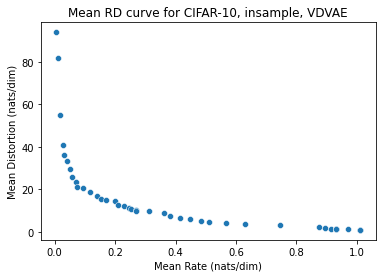

In [73]:
plt.xlabel('Mean Rate (nats/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for CIFAR-10, insample, VDVAE')
sns.scatterplot(cum_rate_mean, distortion_mean)

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


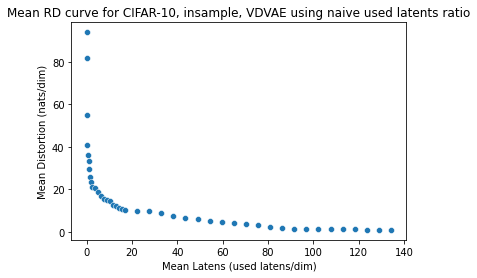

In [74]:
plt.xlabel('Mean Latens (used latens/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for CIFAR-10, insample, VDVAE using naive used latents ratio')
sns.scatterplot(cum_num_latents, distortion_mean)

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


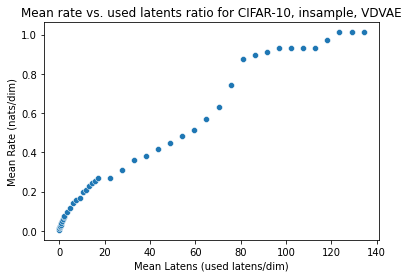

In [75]:
plt.xlabel('Mean Latens (used latens/dim)')
plt.ylabel('Mean Rate (nats/dim)')
plt.title('Mean rate vs. used latents ratio for CIFAR-10, insample, VDVAE')
sns.scatterplot(cum_num_latents, cum_rate_mean)

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


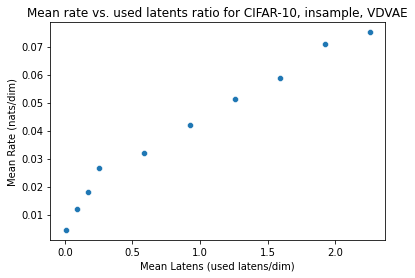

In [76]:
plt.xlabel('Mean Latens (used latens/dim)')
plt.ylabel('Mean Rate (nats/dim)')
plt.title('Mean rate vs. used latents ratio for CIFAR-10, insample, VDVAE')
sns.scatterplot(cum_num_latents[:10], cum_rate_mean[:10])

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


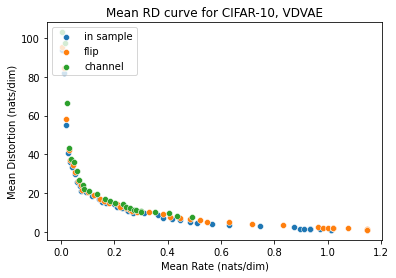

In [231]:
plt.xlabel('Mean Rate (nats/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for CIFAR-10, VDVAE')
sns.scatterplot(cum_rate_mean_in, distortion_mean_in, label="in sample")
sns.scatterplot(cum_rate_mean_flip, distortion_mean_flip, label="flip")
sns.scatterplot(cum_rate_mean_channel, distortion_mean_channel, label="channel")
plt.legend(loc="upper left")

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


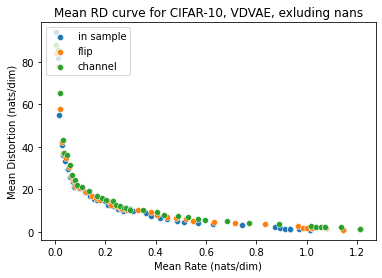

In [515]:
plt.xlabel('Mean Rate (nats/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for CIFAR-10, VDVAE, exluding nans')
sns.scatterplot(cum_rate_mean_in, distortion_mean_in, label="in sample")
sns.scatterplot(cum_rate_mean_flip, distortion_mean_flip, label="flip")
sns.scatterplot(cum_rate_mean_channel, distortion_mean_channel, label="channel")
plt.legend(loc="upper left")

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


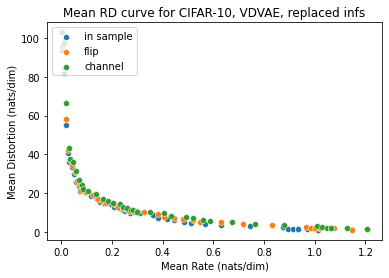

In [464]:
plt.xlabel('Mean Rate (nats/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for CIFAR-10, VDVAE, replaced infs')
sns.scatterplot(cum_rate_mean_in, distortion_mean_in, label="in sample")
sns.scatterplot(cum_rate_mean_flip, distortion_mean_flip, label="flip")
sns.scatterplot(cum_rate_mean_channel, distortion_mean_channel, label="channel")
plt.legend(loc="upper left")

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-package

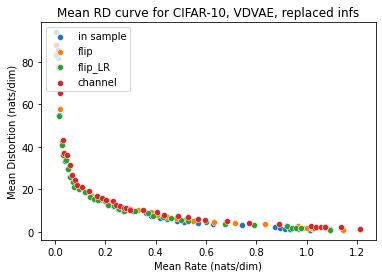

In [603]:
plt.xlabel('Mean Rate (nats/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for CIFAR-10, VDVAE, replaced infs')
sns.scatterplot(cum_rate_mean_in, distortion_mean_in, label="in sample")
sns.scatterplot(cum_rate_mean_flip, distortion_mean_flip, label="flip")
sns.scatterplot(cum_rate_mean_flip_LR, distortion_mean_flip_LR, label="flip_LR")
sns.scatterplot(cum_rate_mean_channel, distortion_mean_channel, label="channel")
plt.legend(loc="upper left")

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


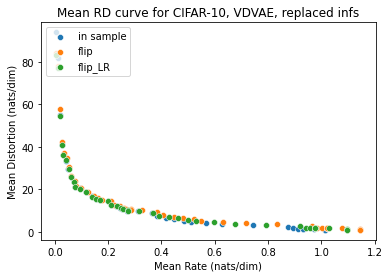

In [605]:
plt.xlabel('Mean Rate (nats/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for CIFAR-10, VDVAE, replaced infs')
sns.scatterplot(cum_rate_mean_in, distortion_mean_in, label="in sample")
sns.scatterplot(cum_rate_mean_flip, distortion_mean_flip, label="flip")
sns.scatterplot(cum_rate_mean_flip_LR, distortion_mean_flip_LR, label="flip_LR")
#sns.scatterplot(cum_rate_mean_channel, distortion_mean_channel, label="channel")
plt.legend(loc="upper left")

In [564]:
cum_rate_mean_in

array([0.00454424, 0.01193185, 0.01799156, 0.02655208, 0.03197506,
       0.04202674, 0.05121394, 0.058923  , 0.07078948, 0.07510252,
       0.0942874 , 0.11786227, 0.14045271, 0.15490219, 0.16832356,
       0.19841722, 0.2093258 , 0.23001562, 0.2454515 , 0.25165492,
       0.27049857, 0.27052033, 0.31159353, 0.36280546, 0.3818178 ,
       0.41610497, 0.4464979 , 0.48415372, 0.51121   , 0.56754845,
       0.6287043 , 0.74450237, 0.8743122 , 0.89478916, 0.9128827 ,
       0.9321823 , 0.9321825 , 0.9321828 , 0.9321831 , 0.97050047,
       1.0117404 , 1.0117407 , 1.0117408 ], dtype=float32)

In [565]:
cum_rate_mean_flip_upside

array([0.00454424, 0.01193023, 0.0179927 , 0.02655999, 0.03197528,
       0.04203033, 0.05123441, 0.05894982, 0.07075319, 0.07506465,
       0.09430421, 0.1178377 , 0.1404565 , 0.15495162, 0.16841154,
       0.19851221, 0.20942715, 0.2301477 , 0.24558693, 0.25186375,
       0.27068344, 0.2707052 , 0.31188905, 0.3630847 , 0.38210517,
       0.41654024, 0.44691464, 0.48448202, 0.5115344 , 0.56795675,
       0.6291391 , 0.7450717 , 0.8748086 , 0.8951666 , 0.91313845,
       0.9323421 , 0.9323423 , 0.9323426 , 0.9323429 , 0.9707322 ,
       1.0120119 , 1.0120121 , 1.0120124 ], dtype=float32)

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


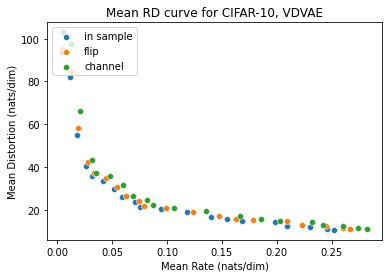

In [232]:
plt.xlabel('Mean Rate (nats/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for CIFAR-10, VDVAE')
sns.scatterplot(cum_rate_mean_in[:20], distortion_mean_in[:20], label="in sample")
sns.scatterplot(cum_rate_mean_flip[:20], distortion_mean_flip[:20], label="flip")
sns.scatterplot(cum_rate_mean_channel[:20], distortion_mean_channel[:20], label="channel")
plt.legend(loc="upper left")

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-package

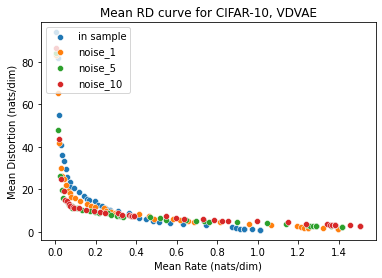

In [517]:
plt.xlabel('Mean Rate (nats/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for CIFAR-10, VDVAE')
sns.scatterplot(cum_rate_mean_in, distortion_mean_in, label="in sample")
sns.scatterplot(cum_rate_mean_noise_1, distortion_mean_noise_1, label="noise_1")
sns.scatterplot(cum_rate_mean_noise_5, distortion_mean_noise_5, label="noise_5")
sns.scatterplot(cum_rate_mean_noise_10, distortion_mean_noise_10, label="noise_10")
#sns.scatterplot(cum_rate_mean_noise_20, distortion_mean_noise_20, label="noise_20")
plt.legend(loc="upper left")

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


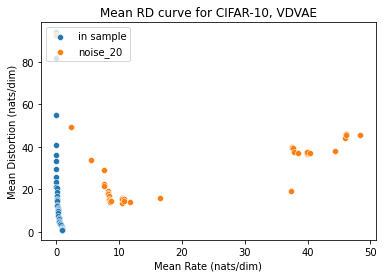

In [519]:
plt.xlabel('Mean Rate (nats/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for CIFAR-10, VDVAE')
sns.scatterplot(cum_rate_mean_in, distortion_mean_in, label="in sample")
#sns.scatterplot(cum_rate_mean_noise_1, distortion_mean_noise_1, label="noise_1")
#sns.scatterplot(cum_rate_mean_noise_5, distortion_mean_noise_5, label="noise_5")
#sns.scatterplot(cum_rate_mean_noise_10, distortion_mean_noise_10, label="noise_10")
sns.scatterplot(cum_rate_mean_noise_20, distortion_mean_noise_20, label="noise_20")
plt.legend(loc="upper left")

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


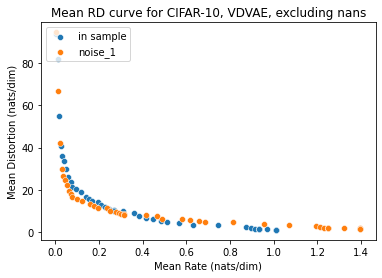

In [419]:
plt.xlabel('Mean Rate (nats/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for CIFAR-10, VDVAE, excluding nans')
sns.scatterplot(cum_rate_mean_in, distortion_mean_in, label="in sample")
sns.scatterplot(cum_rate_mean_noise_1, distortion_mean_noise_1, label="noise_1")
#sns.scatterplot(cum_rate_mean_noise_5, distortion_mean_noise_5, label="noise_5")
#sns.scatterplot(cum_rate_mean_noise_10, distortion_mean_noise_10, label="noise_10")
#sns.scatterplot(cum_rate_mean_noise_20, distortion_mean_noise_20, label="noise_20")
plt.legend(loc="upper left")

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-package

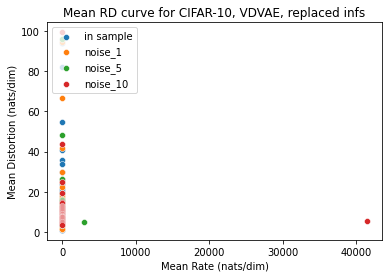

In [470]:
plt.xlabel('Mean Rate (nats/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for CIFAR-10, VDVAE, replaced infs')
sns.scatterplot(cum_rate_mean_in, distortion_mean_in, label="in sample")
sns.scatterplot(cum_rate_mean_noise_1, distortion_mean_noise_1, label="noise_1")
sns.scatterplot(cum_rate_mean_noise_5[:-10], distortion_mean_noise_5[:-10], label="noise_5")
sns.scatterplot(cum_rate_mean_noise_10[:-10], distortion_mean_noise_10[:-10], label="noise_10")
#sns.scatterplot(cum_rate_mean_noise_20, distortion_mean_noise_20, label="noise_20")
plt.legend(loc="upper left")

In [471]:
cum_rate_mean_noise_10

array([6.1678304e-03, 1.7086593e-02, 2.7963366e-02, 4.1862812e-02,
       4.6531029e-02, 5.7391223e-02, 6.8175167e-02, 7.4571237e-02,
       8.9184001e-02, 9.2718020e-02, 1.1998569e-01, 1.4997175e-01,
       1.8999776e-01, 2.2348677e-01, 2.4675359e-01, 3.0859721e-01,
       3.2903805e-01, 3.6212191e-01, 3.7573034e-01, 3.8158077e-01,
       3.9118406e-01, 3.9120421e-01, 5.4915035e-01, 5.9876925e-01,
       6.3706154e-01, 7.2771454e-01, 9.2330861e-01, 4.1456391e+04,
       8.4402168e-01, 9.8723084e-01, 1.1396828e+00, 1.2305825e+00,
       1.3314023e+00, 1.3469299e+00, 1.3588395e+00, 1.3716086e+00,
       1.3716087e+00, 1.3716092e+00, 1.3716099e+00, 1.4491379e+00,
       1.4981093e+00, 1.4981098e+00, 1.4981099e+00], dtype=float32)

In [472]:
num_nans_noise_10

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [428]:
cum_rate_mean_noise_20

array([0.01243818,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf], dtype=float32)

In [78]:
cum_rate = get_cum_rate_from_RD(RD)

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


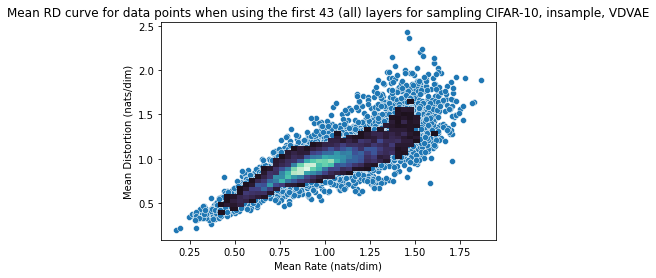

In [234]:
plt.xlabel('Mean Rate (nats/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for data points when using the first 43 (all) layers for sampling CIFAR-10, insample, VDVAE')
sns.scatterplot(cum_rate[42], RD['distortion'][42])
sns.histplot(x=cum_rate[42], y=RD['distortion'][42], bins=50, pthresh=.1, cmap="mako")

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


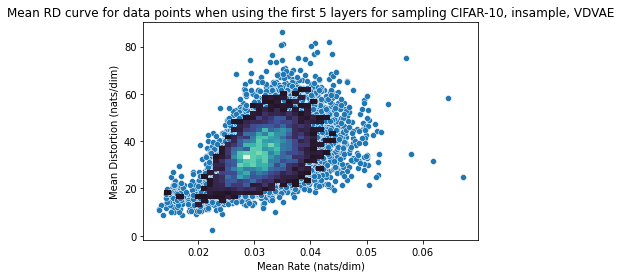

In [81]:
plt.xlabel('Mean Rate (nats/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for data points when using the first 5 layers for sampling CIFAR-10, insample, VDVAE')
sns.scatterplot(cum_rate[4], RD['distortion'][4])
sns.histplot(x=cum_rate[4], y=RD['distortion'][4], bins=50, pthresh=.1, cmap="mako")

In [235]:
cum_rate_channel = get_cum_rate_from_RD(RD_channel)

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


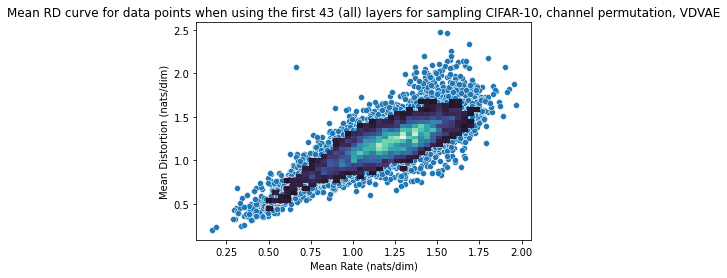

In [360]:
plt.xlabel('Mean Rate (nats/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for data points when using the first 43 (all) layers for sampling CIFAR-10, channel permutation, VDVAE')
sns.scatterplot(cum_rate_channel[42], RD_channel['distortion'][42])
sns.histplot(x=cum_rate_channel[42], y=RD_channel['distortion'][42], bins=50, pthresh=.1, cmap="mako")

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


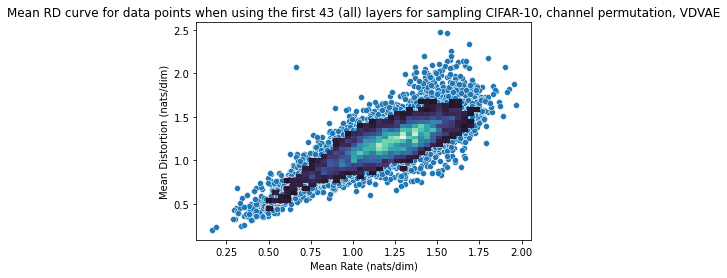

In [474]:
plt.xlabel('Mean Rate (nats/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for data points when using the first 43 (all) layers for sampling CIFAR-10, channel permutation, VDVAE')
sns.scatterplot(cum_rate_channel[42], RD_channel['distortion'][42])
sns.histplot(x=cum_rate_channel[42], y=RD_channel['distortion'][42], bins=50, pthresh=.1, cmap="mako")

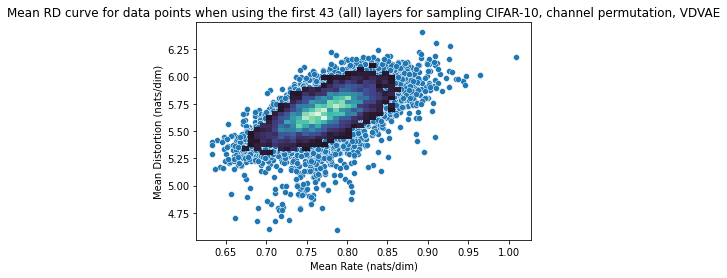

In [492]:
plt.xlabel('Mean Rate (nats/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for data points when using the first 43 (all) layers for sampling CIFAR-10, channel permutation, VDVAE')
sns.scatterplot(cum_rate_noise_10[26][cum_rate_noise_10[26] < 10], RD_noise_10['distortion'][26][cum_rate_noise_10[26] < 10])
sns.histplot(x=cum_rate_noise_10[26][cum_rate_noise_10[26] < 10], y=RD_noise_10['distortion'][26][cum_rate_noise_10[26] < 10], bins=50, pthresh=.1, cmap="mako")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


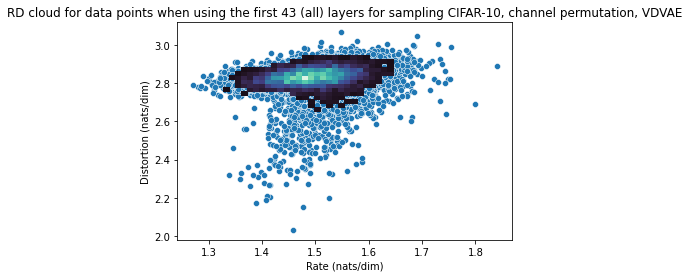

In [523]:
plt.xlabel('Rate (nats/dim)')
plt.ylabel('Distortion (nats/dim)')
plt.title('RD cloud for data points when using the first 43 (all) layers for sampling CIFAR-10, channel permutation, VDVAE')
sns.scatterplot(cum_rate_noise_10[42][cum_rate_noise_10[42] < 10], RD_noise_10['distortion'][42][cum_rate_noise_10[42] < 10])
sns.histplot(x=cum_rate_noise_10[42][cum_rate_noise_10[42] < 10], y=RD_noise_10['distortion'][42][cum_rate_noise_10[42] < 10], bins=50, pthresh=.1, cmap="mako")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


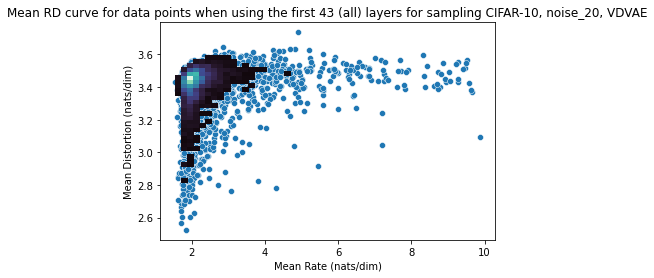

In [522]:
plt.xlabel('Mean Rate (nats/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for data points when using the first 43 (all) layers for sampling CIFAR-10, noise_20, VDVAE')
sns.scatterplot(cum_rate_noise_20[42][cum_rate_noise_20[42] < 10], RD_noise_20['distortion'][42][cum_rate_noise_20[42] < 10])
sns.histplot(x=cum_rate_noise_20[42][cum_rate_noise_20[42] < 10], y=RD_noise_20['distortion'][42][cum_rate_noise_20[42] < 10], bins=50, pthresh=.1, cmap="mako")

In [494]:
for i in range(42):
    print(i, (np.isfinite(cum_rate_noise_10[i])).sum())

0 10000
1 10000
2 10000
3 10000
4 10000
5 10000
6 10000
7 10000
8 10000
9 10000
10 10000
11 10000
12 10000
13 10000
14 10000
15 10000
16 10000
17 10000
18 10000
19 10000
20 10000
21 10000
22 10000
23 10000
24 10000
25 10000
26 10000
27 10000
28 9999
29 9999
30 9999
31 9999
32 9999
33 9999
34 9999
35 9999
36 9999
37 9999
38 9999
39 9999
40 9999
41 9999


In [499]:
for i in range(42):
    print(i, (cum_rate_noise_10[i] > 100).sum())

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 1
27 1
28 1
29 1
30 1
31 1
32 1
33 1
34 1
35 1
36 1
37 0
38 0
39 0
40 0
41 0


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [493]:
cum_rate_noise_10.mean()

nan

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


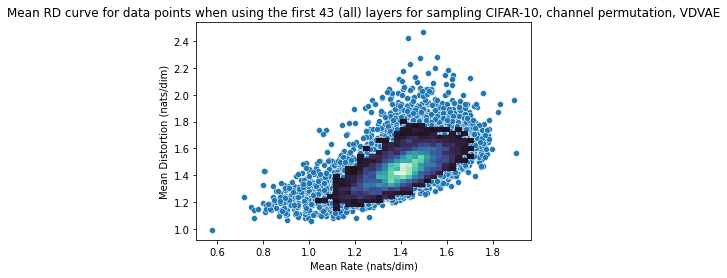

In [475]:
plt.xlabel('Mean Rate (nats/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for data points when using the first 43 (all) layers for sampling CIFAR-10, channel permutation, VDVAE')
sns.scatterplot(cum_rate_noise_1[42], RD_noise_1['distortion'][42])
sns.histplot(x=cum_rate_noise_1[42], y=RD_noise_1['distortion'][42], bins=50, pthresh=.1, cmap="mako")

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-package

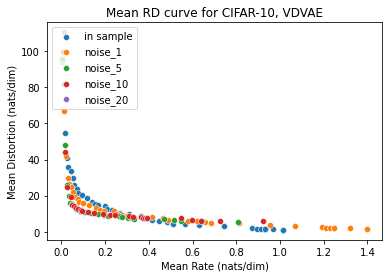

In [216]:
plt.xlabel('Mean Rate (nats/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for CIFAR-10, VDVAE')
sns.scatterplot(cum_rate_mean_in, distortion_mean_in, label="in sample")
sns.scatterplot(cum_rate_mean_noise_1, distortion_mean_noise_1, label="noise_1")
sns.scatterplot(cum_rate_mean_noise_5, distortion_mean_noise_5, label="noise_5")
sns.scatterplot(cum_rate_mean_noise_10, distortion_mean_noise_10, label="noise_10")
sns.scatterplot(cum_rate_mean_noise_20, distortion_mean_noise_20, label="noise_20")
plt.legend(loc="upper left")

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


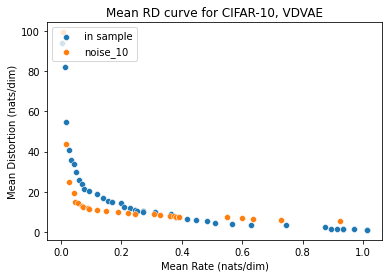

In [218]:
plt.xlabel('Mean Rate (nats/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for CIFAR-10, VDVAE')
sns.scatterplot(cum_rate_mean_in, distortion_mean_in, label="in sample")
sns.scatterplot(cum_rate_mean_noise_10, distortion_mean_noise_10, label="noise_10")
plt.legend(loc="upper left")

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


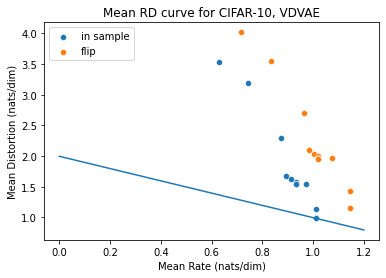

In [374]:
x = np.linspace(0, 1.2, 1000)
y = 1.996 - x
plt.xlabel('Mean Rate (nats/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for CIFAR-10, VDVAE')
sns.scatterplot(cum_rate_mean_in[30:], distortion_mean_in[30:], label="in sample")
sns.scatterplot(cum_rate_mean_flip[30:], distortion_mean_flip[30:], label="flip")
sns.scatterplot(cum_rate_mean_channel[30:], distortion_mean_channel[30:], label="channel")
plt.plot(x,y)
plt.legend(loc="upper left")

In [364]:
cum_rate_mean_flip[-1] + distortion_mean_flip[-1]

2.29973

In [367]:
cum_rate_mean_noise_1[-1] + distortion_mean_noise_1[-1]

2.8674958

In [368]:
cum_rate_mean_noise_5[-1] + distortion_mean_noise_5[-1]

nan

In [370]:
x = np.linspace(0, 1.2, 1000)
y = 1.996 - x